# Exponential distibution

In [1]:
# my own func
import random 
import math

def my_expon(lam, n):
    lst = []
    for i in range(n):
        r = random.random()
        x = -math.log(r,math.e) / lam
        lst.append(float('{:.3f}'.format(x)))
    
    return lst
    
# Создание m массивов выборки
def make_vibor_exp(lam, m):
    A = []
    for i in range(5):
        row = []
        A.append(row)
    
        row.append(my_expon(lam, m))
        
    l = 1
    #print('Реализация выборки экспоненциального распределени объема %d: '%m)
    #print('')
    for k in A:
        #print('%d): '%l, end='')
        print(*k)
        l += 1
    return A

<font color='red'> Моделирование выбранных случайных величин </font>

In [2]:
make_vibor_exp(0.1, 5)

[4.2, 10.695, 5.549, 4.41, 10.296]
[0.557, 20.375, 0.244, 7.792, 22.191]
[4.946, 3.066, 0.196, 27.204, 5.938]
[3.298, 8.145, 2.708, 10.97, 1.287]
[29.625, 1.268, 1.334, 7.242, 2.264]


[[[4.2, 10.695, 5.549, 4.41, 10.296]],
 [[0.557, 20.375, 0.244, 7.792, 22.191]],
 [[4.946, 3.066, 0.196, 27.204, 5.938]],
 [[3.298, 8.145, 2.708, 10.97, 1.287]],
 [[29.625, 1.268, 1.334, 7.242, 2.264]]]

In [3]:
make_vibor_exp(0.1, 10)

[5.98, 3.587, 20.439, 3.331, 38.281, 1.901, 16.727, 4.438, 15.422, 3.581]
[6.564, 17.691, 3.273, 42.927, 2.962, 26.65, 5.645, 1.752, 3.487, 19.15]
[26.29, 14.614, 14.734, 2.775, 13.094, 10.92, 1.804, 2.38, 0.026, 1.559]
[1.866, 30.662, 0.335, 18.342, 5.637, 12.703, 0.283, 2.776, 7.133, 4.095]
[0.002, 16.778, 18.75, 6.937, 19.151, 4.318, 39.247, 14.079, 8.907, 14.544]


[[[5.98, 3.587, 20.439, 3.331, 38.281, 1.901, 16.727, 4.438, 15.422, 3.581]],
 [[6.564, 17.691, 3.273, 42.927, 2.962, 26.65, 5.645, 1.752, 3.487, 19.15]],
 [[26.29, 14.614, 14.734, 2.775, 13.094, 10.92, 1.804, 2.38, 0.026, 1.559]],
 [[1.866, 30.662, 0.335, 18.342, 5.637, 12.703, 0.283, 2.776, 7.133, 4.095]],
 [[0.002, 16.778, 18.75, 6.937, 19.151, 4.318, 39.247, 14.079, 8.907, 14.544]]]

In [4]:
#make_vibor_exp(0.1, 100)

In [5]:
#make_vibor_exp(0.1, 1000)

In [6]:
#make_vibor_exp(0.1, 10000)

<font color='red'> Построение эмпирической функции распределения </font> 

In [7]:
import pylab
import math 
import matplotlib
import random
import numpy as np
import scipy.stats as sc
from random import randint
import matplotlib.pyplot as plt


# Создание m массивов выборки
def make_vibor_exp(lam, m):
    A = []
    for i in range(5):
        row = []
        A.append(row)
    
        row.append(my_expon(lam, m))
        
    l = 1
    #print('Реализация выборки экспоненциального распределени объема %d: '%m)
    #print('')
    for k in A:
        #print('%d): '%l, end='')
        #print(*k)
        l += 1
    return A


def make_efr_expon(M, n, f_x = -1):

    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', ]

    upper_list = []
    
    
    for sp in range(5):
        dict_set = {}
        for i in M[sp]:
            #print(i)
            s1 = sorted(set(i)) # вариационный ряд
            capacity_vibor = len(s1)
            
            #словарь: ключ - случайная величина, значение - частота встречаемости
            for k in s1:
                dict_set[k] = [0, 0]

            for t in i: 
                dict_set[t][0] += 1
            
            # Добавление в словарь второго значения - его вероятность 
            for s in dict_set:
                a = dict_set[s][0] / n 
                dict_set[s][1] = float('{:.2f}'.format(a))

            
            lst = []
            for elem in dict_set:
                lst.append([elem, dict_set[elem][1]])
            #print(lst)
            

            #print("Эмпирическая функция для реализации %d выборки объема %s:  "%(sp + 1, n))
            final_sum = 0
            for index in range(len(lst) - 1):
                
                
                #-------------------------------------------------------------upper_limit
                final_sum += lst[index][1]
                #print(lst[index + 1])
                if lst[index ][0] <= f_x <= lst[index + 1][0]:
                    upper_list.append(final_sum)
                
                #-----------------------------------------------------------------------------
                    
                
              
                
                if f_x == -1:
                    
                    x0, y0 = [-2, lst[0][0]], [0,0]
                    x1, y1 = [lst[index][0], lst[index + 1][0]],[final_sum, final_sum]
                    x2, y2 = [lst[len(lst) - 1][0],lst[len(lst) - 1][0] + 2], [1,1]

                    #x3, y3 =[lst[0][0] - 3, lst[len(lst) - 1][0] + 3],[quant, quant]# нахождение квантили


                    plt.grid(True) #Сетка
                    plt.plot(x0,y0, x1,y1, x2, y2, marker = 'o', color = color[sp])

            if lst[len(lst) - 1][0] < f_x:
                    upper_list.append(1)
            #print(upper_list)
        
        if f_x == -1:
            plt.plot(0,0, color = color[sp], label = 'Реализация %d'%(sp+ 1))
            
            pylab.legend ()
            #plt.show()

    return upper_list






def make_сdf_expon():
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(sc.expon.ppf(0.01), sc.expon.ppf(0.9), 100)
    

    ax.plot(x, sc.expon.cdf(x),'r-', lw=5, alpha = 0.6, label='expon cdf')

    rv = sc.expon()
    
    #ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
    plt.grid(True) #Сетка
    ax.legend(loc='best', frameon = False)
    #plt.show()

    
def upper_limit_expon(M, n , f_x):
    lol = make_efr_expon(M, n, f_x)
    lol.sort(reverse = True)
        
    fin = -10000 # просто так
    #--------------------------------Ищем разность
    for i in range(len(lol) - 1):
        for k in range(len(lol)):
            res = lol[i] - lol[k]
            if res > fin:
                fin = res


    print('Точная верхняя граница выборки объема %d: '%n, float('{:.4f}'.format(abs(fin))))
    
    

<font color='blue'>Эфр для выборок объема 5: </font> 

[]

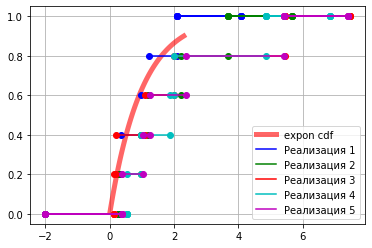

In [8]:
M = make_vibor_exp(0.8, 5)
make_сdf_expon()
make_efr_expon(M, 5)

<font color='blue'>Эфр для выборок объема 10: </font> 

[]

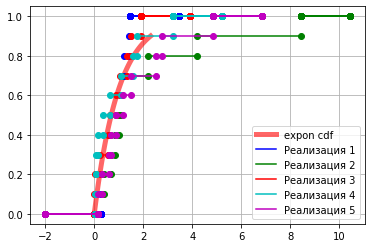

In [9]:
M = make_vibor_exp(0.8, 10)
make_сdf_expon()
make_efr_expon(M, 10)

<font color='blue'>Эфр для выборок объема 100: </font> 

[]

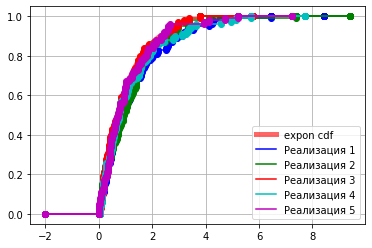

In [10]:
M = make_vibor_exp(0.8, 100)
make_сdf_expon()
make_efr_expon(M, 100)

<font color='blue'>Эфр для выборок объема 1000: </font> 

In [11]:
#M = make_vibor_exp(0.8, 1000)
#make_сdf_expon()
#make_efr_expon(M, 1000)

<font color='blue'>Эфр для выборок объема 10**5: </font> 

In [12]:
#M = make_vibor_exp(0.8, 10**5)
#make_сdf_expon()
#make_efr_expon(M, 10**5)

<font color='red'> Нахождение точной верхней границы </font> 

<font color='green'> Для n = 5: </font> 

In [13]:
M = make_vibor_exp(0.8, 5)
upper_limit_expon(M, 5, 4)

Точная верхняя граница выборки объема 5:  0.0


<font color='green'> Для n = 10: </font> 

In [14]:
M = make_vibor_exp(0.8, 10)
upper_limit_expon(M, 10, 4)

Точная верхняя граница выборки объема 10:  0.1


<font color='green'> Для n = 100: </font> 

In [15]:
M = make_vibor_exp(0.8, 100)
upper_limit_expon(M, 100, 4)

Точная верхняя граница выборки объема 100:  0.05


<font color='green'> Для n = 1000: </font> 

In [16]:
M = make_vibor_exp(0.8, 1000)
upper_limit_expon(M, 1000, 4)

Точная верхняя граница выборки объема 1000:  0.02


<font color='green'> Для n = 10**5: </font> 

In [17]:
M = make_vibor_exp(0.8, 10**5)
upper_limit_expon(M, 10**5, 4)

Точная верхняя граница выборки объема 100000:  0.0


<font color='red'> Построение вариационного ряда </font> 

In [18]:
#функция для построения вар.рядов для 5 реализаций  выборки M для n
def make_var_row_exp(n, M):
    dict_set = {}
    
    print('Вариационные ряды для 5 реализаций выборки, объема  %d:  '%n)
    print('')
    
    for sp in range(5):
        dict_set = {}
        for i in M[sp]:
            s1 = sorted(set(i))
            for k in s1:
                dict_set[k] = 0

            for t in i:
                dict_set[t] += 1

            
            print('X:', end= '\t')
            
            for elem in dict_set:
                print(elem, end='\t')
            print('')
            print('----------'*n)
            print('f:', end= '\t')
            
            for elem in dict_set:
                print(dict_set[elem], end='\t')
            print('')
            print('')
            print('')
            print('')
            #print('------')

In [19]:
M = make_vibor_exp(0.8, 5)
make_var_row_exp(5, M)

Вариационные ряды для 5 реализаций выборки, объема  5:  

X:	0.255	0.46	0.638	0.824	3.873	
--------------------------------------------------
f:	1	1	1	1	1	



X:	0.162	0.325	0.926	1.139	1.236	
--------------------------------------------------
f:	1	1	1	1	1	



X:	0.137	0.181	0.191	0.192	0.834	
--------------------------------------------------
f:	1	1	1	1	1	



X:	0.401	0.506	0.671	1.107	1.689	
--------------------------------------------------
f:	1	1	1	1	1	



X:	0.001	0.345	0.648	2.515	3.74	
--------------------------------------------------
f:	1	1	1	1	1	





In [20]:
M = make_vibor_exp(0.8, 10)
make_var_row_exp(10, M)

Вариационные ряды для 5 реализаций выборки, объема  10:  

X:	0.08	0.114	0.117	0.724	0.853	0.881	1.011	1.159	1.283	2.087	
----------------------------------------------------------------------------------------------------
f:	1	1	1	1	1	1	1	1	1	1	



X:	0.058	0.416	0.439	0.508	0.922	1.103	1.709	3.315	3.98	8.346	
----------------------------------------------------------------------------------------------------
f:	1	1	1	1	1	1	1	1	1	1	



X:	0.022	0.101	0.103	0.132	0.18	1.138	1.508	2.3	5.796	
----------------------------------------------------------------------------------------------------
f:	1	1	1	2	1	1	1	1	1	



X:	0.017	0.124	0.242	0.724	0.819	0.821	1.104	1.349	1.938	2.31	
----------------------------------------------------------------------------------------------------
f:	1	1	1	1	1	1	1	1	1	1	



X:	0.135	0.168	0.547	1.06	1.133	1.188	2.489	2.998	3.171	3.335	
----------------------------------------------------------------------------------------------------
f:	1	1	1	1	1	1	1	1	1	1	

In [21]:
#M = make_vibor_exp(0.8, 100)
#make_var_row_exp(100, M)

In [22]:
#M = make_vibor_exp(0.8, 1000)
#make_var_row_exp(1000, M)

In [23]:
#M = make_vibor_exp(0.8, 10**5)
#make_var_row_exp(10**5, M)

# Гистограмма и полигон частот

In [91]:
#функция для построения вар.рядов для 5 реализаций  выборки M для n
import pandas as pd
def make_expon_gist(n, M):
    dict_set = {}
    
    
    for sp in range(5):
        dict_set = {}
        for i in M[sp]:
            s1 = sorted(set(i))
            
            #заносим все различные знаения выборки в словарь
            for k in s1:
                dict_set[str(k)] = 0
            
            #считаем сколько раз каждое из них встречается
            for t in i:
                dict_set[str(t)] += 1
            
            # Переделываем знчения в список
            lin_x = []
            lin_y = []
            sum = 0
            dict_viborka = {k: v for k, v in dict_set.items()}
            for i in dict_viborka:
                #print(i)
                sum += dict_viborka[i]
                lin_x.append(float(i))
                #print(dict_viborka[i] - dict_viborka[i])
                lin_y.append(dict_viborka[i] / float(i))
    
            #print(sum)
            #print(lin_x, lin_y)
            
            
            plt.title('Гистограмма частот для выборок объема %s' %n)
            #print(lin_x, lin_y)
            plt.bar(lin_x, lin_y)
            #делаем красиво
            #print('')
            #print('Вариационный ряд выборки %s объема %d: '%(sp + 1, n) )
            
            
            
            # создаем DataFrame и выводим его на экран
            df = pd.DataFrame(dict_viborka,index = list('f'))

        
            #display(df)

Вариационные ряды для 5 реализаций выборки, объема  5:  

X:	0.276	0.368	0.459	0.617	3.933	
--------------------------------------------------
f:	1	1	1	1	1	



X:	0.057	0.186	0.311	0.463	0.647	
--------------------------------------------------
f:	1	1	1	1	1	



X:	0.651	0.926	1.044	1.762	2.683	
--------------------------------------------------
f:	1	1	1	1	1	



X:	0.179	0.309	0.552	0.694	2.109	
--------------------------------------------------
f:	1	1	1	1	1	



X:	0.163	0.927	1.014	1.269	1.723	
--------------------------------------------------
f:	1	1	1	1	1	





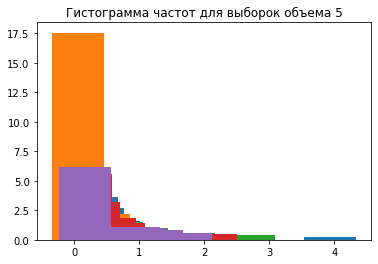

In [92]:
M = make_vibor_exp(0.8, 5)
make_var_row_exp(5, M)
make_expon_gist(5, M)

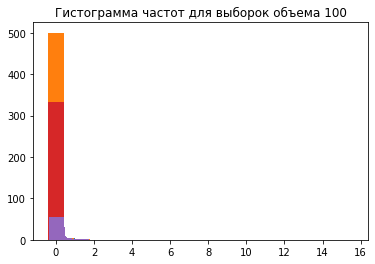

In [93]:
M = make_vibor_exp(0.8, 100)
make_expon_gist(100, M)